In [13]:
import pandas as pd
from scipy.stats.mstats import winsorize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import rc
# rc('font', family='Malgun Gothic')
# plt.rcParams['axes.unicode_minus'] = False
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore')

In [14]:
expansion_normal_win = pd.read_csv('../Data/WIN/expansion_normal_win.csv',encoding='CP949')
recession_normal_win = pd.read_csv('../Data/WIN/recession_normal_win.csv',encoding='CP949')
transition_normal_win =  pd.read_csv('../Data/WIN/transition_normal_win.csv',encoding='CP949')
expansion_default_win =  pd.read_csv('../Data/WIN/expansion_default_win.csv',encoding='CP949')
recession_default_win = pd.read_csv('../Data/WIN/recession_default_win.csv',encoding='CP949')
transition_default_win =  pd.read_csv('../Data/WIN/transition_default_win.csv',encoding='CP949')

In [15]:
recession = pd.concat([recession_normal_win ,recession_default_win], axis=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1)) 
recession.iloc[:,3:-1]=scaler.fit_transform(recession.iloc[:,3:-1])

normal = recession[recession['부도']==0]
default = recession[recession['부도']==1]


# fig, axes = plt.subplots(nrows = 6, ncols = 6,figsize=(20, 20),constrained_layout=True)   
# axes = axes.flatten()         # Convert axes to 1d array of length 9
# # fig.set_size_inches(1, 15) #비율로 figsize 조정 



# for ax, col in zip(axes, normal.iloc[:,3:-1].columns):
#     sns.distplot(default.iloc[:,3:-1][col], ax = ax, color='red')    
#     sns.distplot(normal.iloc[:,3:-1][col], ax = ax, color='blue')
#     ax.set(xlabel="", ylabel="")
#     ax.set_title(col)

In [16]:
expansion = pd.concat([expansion_normal_win, expansion_default_win], axis=0)
recession = pd.concat([recession_normal_win,recession_default_win], axis=0)
transition = pd.concat([transition_normal_win,transition_default_win],axis=0)

In [17]:
recession_default_win

,회사명,거래소코드,회계년도,유동비율,차입금의존도,매출액증가율,유형자산증가율,총자본증가율,매출액총이익률,매출액영업이익률,...,vol자기자본순이익률,vol총자본영업이익률,vol당좌비율,vol부채비율,vol이자보상배율,vol재고자산회전률,vol매출채권회전률,vol총자본회전률,vol매입채무회전률,부도
0,(주)나노하이텍,71360,2008,133.50,20.58,-39.69,-12.18,-10.61,-3.02,-61.79,...,-130.37,-29.29,-17.26,85.82,-13.758948,8.20,0.29,-0.16,0.59,1.0
1,(주)네오리소스,58550,2008,51.87,89.91,-86.43,520.78,-35.83,44.39,-386.03,...,-436.45,1.91,-575.48,-1441.57,24.903598,-37.66,-3.76,-0.34,-16.62,1.0
2,(주)네오퍼플,28090,2012,100.27,53.30,-23.29,-65.65,-4.98,14.29,-16.66,...,-49.33,-10.35,17.34,26.85,-2.456870,-2.04,-1.22,-0.16,-0.66,1.0
3,(주)넥스텔,37220,2003,98.58,37.39,62.56,488.13,18.87,3.67,-26.72,...,-7.67,3.35,-575.48,10.05,2.278215,-14.11,4.65,0.19,0.97,1.0
4,(주)넷컴스토리지,37010,2003,78.01,78.11,-35.78,-9.67,-29.76,7.15,-17.55,...,-112.37,-7.33,-75.99,498.65,-0.930307,-0.70,1.44,-0.11,0.48,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,텔슨전자(주),27350,2003,86.18,32.66,-22.85,-66.64,-31.64,9.73,-5.67,...,-36.12,-12.84,-15.50,-103.99,-3.533791,-2.90,-5.24,-0.29,-3.37,1.0
123,텔슨정보통신(주),18180,2004,10.03,196.65,-82.03,-52.25,-79.09,-0.76,-65.57,...,48.69,-26.74,-74.97,-1441.57,-1.968229,-0.95,-1.21,-0.43,-0.84,1.0
124,해원에스티(주),58480,2009,99.04,49.82,-20.07,-12.09,-9.48,4.29,2.43,...,18.26,-2.33,7.36,48.68,-0.500208,-2.05,-2.28,-0.47,-2.17,1.0
125,현주컴퓨터(주),38960,2004,53.45,43.28,-47.49,-6.75,-29.61,2.87,-10.62,...,-182.36,-36.56,-31.43,861.89,-14.164111,-6.60,-6.70,-0.78,-3.81,1.0


## 등분산/이분산 분류 ->t검정을 통해 pvalue 확인 후 피쳐 줄이기

In [18]:
# Levene's test 
from scipy import stats
from scipy.stats import levene
levene_list = []
recession_list_pick = []
recession_list_drop = []

for col in recession_normal_win.iloc[:,3:-1].columns: 
    a = levene(recession_normal_win.loc[:,col],recession_default_win.loc[:,col])
    levene_list.append(a)

recession_df = pd.DataFrame(levene_list, index= recession_normal_win.iloc[:,3:-1].columns)
s_t_test = recession_df[recession_df['pvalue']>0.05] #H0 귀무가설을 채택 => 등분산성
w_t_test = recession_df[recession_df['pvalue']<=0.05] #H1 귀무가설 기각 => 이분산성 

for col in s_t_test.loc[:,'pvalue'].index:
    s_t, s_p = stats.ttest_ind(recession_normal_win.loc[:,col], recession_default_win.loc[:,col], equal_var= True)
                                                                                    #equal_var= False : 이분산 
    print('\n')
    print("student's t test Result\n ------------------------")
    print(f' {col} 등분산 t값은 {s_t:.3f} 이다. ')
    print(f' {col} 등분산 p값은 {s_p:.3f} 이다. ')                                                                                #equal_var= True : 등분산
    # if s_p <= 0.05 :

    #     recession_list_pick.append(col)
    # else:
    #     recession_list_drop.append(col)

from scipy import stats
for col in w_t_test.loc[:,'pvalue'].index:
    w_t, w_p = stats.ttest_ind(recession_normal_win.loc[:,col], recession_default_win.loc[:,col], equal_var= False)
    print("welch's t test Result\n ------------------------")
    print(f' {col} 이분산 t값은 {w_t:.3f} 이다. ')
    print(f' {col} 이분산 p값은 {w_p:.3f} 이다. ')
    # if w_p <= 0.05 :
          
    #     recession_list_pick.append(col)
    # else:
    #     recession_list_drop.append(col)

print(recession_list_pick)



student's t test Result
 ------------------------
 재고자산회전률 등분산 t값은 0.365 이다. 
 재고자산회전률 등분산 p값은 0.715 이다. 


student's t test Result
 ------------------------
 매입채무회전률 등분산 t값은 3.670 이다. 
 매입채무회전률 등분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 유동비율 이분산 t값은 17.116 이다. 
 유동비율 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 차입금의존도 이분산 t값은 -10.804 이다. 
 차입금의존도 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 매출액증가율 이분산 t값은 4.181 이다. 
 매출액증가율 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 유형자산증가율 이분산 t값은 -1.151 이다. 
 유형자산증가율 이분산 p값은 0.252 이다. 
welch's t test Result
 ------------------------
 총자본증가율 이분산 t값은 8.434 이다. 
 총자본증가율 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 매출액총이익률 이분산 t값은 7.068 이다. 
 매출액총이익률 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 매출액영업이익률 이분산 t값은 9.118 이다. 
 매출액영업이익률 이분산 p값은 0.000 이다. 
welch's t test Result
 ------------------------
 매출액순이익률 이분산 t

In [19]:
recession_df.to_csv('recession_df 기초통계량.csv',encoding='CP949')

In [20]:
len(recession.columns)

40

In [21]:
recession_list_pick

[]

In [22]:
pick_lst =['회사명', '거래소코드', '회계년도','매입채무회전률',
 '유동비율',
 '차입금의존도',
 '매출액증가율',
 '총자본증가율',
 '매출액총이익률',
 '매출액영업이익률',
 '매출액순이익률',
 '총자본영업이익률',
 '자기자본순이익률',
 '당좌비율',
 '부채비율',
 '총자본회전률',
 '현금순환주기',
 'RETA',
 'TLTA',
 '이자보상배율',
 'vol유동비율',
 'vol총자본증가율',
 'vol매출액총이익률',
 'vol매출액영업이익률',
 'vol자기자본순이익률',
 'vol총자본영업이익률',
 'vol당좌비율',
 'vol이자보상배율',
 'vol총자본회전률','부도']

In [23]:
recession = recession[pick_lst]
recession

,회사명,거래소코드,회계년도,매입채무회전률,유동비율,차입금의존도,매출액증가율,총자본증가율,매출액총이익률,매출액영업이익률,...,vol유동비율,vol총자본증가율,vol매출액총이익률,vol매출액영업이익률,vol자기자본순이익률,vol총자본영업이익률,vol당좌비율,vol이자보상배율,vol총자본회전률,부도
0,(주)CMG제약,58820,2003,26.59,185.63,29.13,-34.12,-28.17,0.70,-5.26,...,71.42,-1.83,10.82,9.20,31.13,14.12,6.95,6.620932,-0.14,0.0
1,(주)CMG제약,58820,2004,24.16,149.73,29.59,-24.76,-29.31,0.00,-21.69,...,-35.90,-25.01,-13.79,-16.43,-60.49,-16.47,-6.44,-19.555138,0.30,0.0
2,(주)CMG제약,58820,2009,6.19,108.59,14.75,-6.12,-29.31,24.33,-56.54,...,-230.95,-74.42,-12.27,-30.91,-60.49,-16.47,-203.94,-3.233485,-0.03,0.0
3,(주)CMG제약,58820,2012,7.83,690.25,34.21,-8.43,74.65,28.34,-24.88,...,225.70,65.23,-13.49,-28.81,-20.49,-12.27,197.07,-11.301693,-0.31,0.0
4,(주)ES큐브,50120,2003,28.08,289.84,12.46,-12.38,0.96,8.79,0.60,...,49.43,0.96,-1.62,-2.51,-2.19,-7.45,50.75,-1.759783,-0.37,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,텔슨전자(주),27350,2003,5.59,86.18,32.66,-22.85,-31.64,9.73,-5.67,...,-2.97,-70.07,-4.75,-10.71,-36.12,-12.84,-15.50,-3.533791,-0.29,1.0
123,텔슨정보통신(주),18180,2004,3.30,10.03,196.65,-82.03,-79.09,-0.76,-65.57,...,-119.83,-26.52,-17.18,-65.88,48.69,-26.74,-74.97,-1.968229,-0.43,1.0
124,해원에스티(주),58480,2009,5.96,99.04,49.82,-20.07,-9.48,4.29,2.43,...,2.52,-26.55,-0.59,-0.58,18.26,-2.33,7.36,-0.500208,-0.47,1.0
125,현주컴퓨터(주),38960,2004,12.70,53.45,43.28,-47.49,-29.61,2.87,-10.62,...,-51.03,-29.75,-8.04,-10.45,-182.36,-36.56,-31.43,-14.164111,-0.78,1.0


컬럼 총 40개 - > 30개로 줄어듦

### 피쳐 선정 및 학습에 사용할 컬럼만 재 추출(회사명,거래소코드,회계년도 제외)

In [24]:
recession_x = recession.iloc[:,3:-1]
recession_y = recession['부도']

In [25]:
recession_x

,매입채무회전률,유동비율,차입금의존도,매출액증가율,총자본증가율,매출액총이익률,매출액영업이익률,매출액순이익률,총자본영업이익률,자기자본순이익률,...,이자보상배율,vol유동비율,vol총자본증가율,vol매출액총이익률,vol매출액영업이익률,vol자기자본순이익률,vol총자본영업이익률,vol당좌비율,vol이자보상배율,vol총자본회전률
0,26.59,185.63,29.13,-34.12,-28.17,0.70,-5.26,0.63,-6.91,1.70,...,-3.368571,71.42,-1.83,10.82,9.20,31.13,14.12,6.95,6.620932,-0.14
1,24.16,149.73,29.59,-24.76,-29.31,0.00,-21.69,-29.60,-19.49,-86.13,...,-16.702348,-35.90,-25.01,-13.79,-16.43,-60.49,-16.47,-6.44,-19.555138,0.30
2,6.19,108.59,14.75,-6.12,-29.31,24.33,-56.54,-129.17,-19.49,-90.90,...,-8.285655,-230.95,-74.42,-12.27,-30.91,-60.49,-16.47,-203.94,-3.233485,-0.03
3,7.83,690.25,34.21,-8.43,74.65,28.34,-24.88,-42.40,-9.57,-27.63,...,-7.451260,225.70,65.23,-13.49,-28.81,-20.49,-12.27,197.07,-11.301693,-0.31
4,28.08,289.84,12.46,-12.38,0.96,8.79,0.60,1.56,1.51,5.20,...,2.241475,49.43,0.96,-1.62,-2.51,-2.19,-7.45,50.75,-1.759783,-0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,5.59,86.18,32.66,-22.85,-31.64,9.73,-5.67,-8.47,-6.04,-31.06,...,-1.623835,-2.97,-70.07,-4.75,-10.71,-36.12,-12.84,-15.50,-3.533791,-0.29
123,3.30,10.03,196.65,-82.03,-79.09,-0.76,-65.57,-273.63,-26.48,-111.00,...,-1.923068,-119.83,-26.52,-17.18,-65.88,48.69,-26.74,-74.97,-1.968229,-0.43
124,5.96,99.04,49.82,-20.07,-9.48,4.29,2.43,3.16,3.95,14.82,...,0.881234,2.52,-26.55,-0.59,-0.58,18.26,-2.33,7.36,-0.500208,-0.47
125,12.70,53.45,43.28,-47.49,-29.61,2.87,-10.62,-11.61,-37.53,-176.77,...,-14.987852,-51.03,-29.75,-8.04,-10.45,-182.36,-36.56,-31.43,-14.164111,-0.78


In [26]:
recession_y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
122    1.0
123    1.0
124    1.0
125    1.0
126    1.0
Name: 부도, Length: 5148, dtype: float64

# 데이터셋 분리

In [34]:
recession_x

,매입채무회전률,유동비율,차입금의존도,매출액증가율,총자본증가율,매출액총이익률,매출액영업이익률,매출액순이익률,총자본영업이익률,자기자본순이익률,...,이자보상배율,vol유동비율,vol총자본증가율,vol매출액총이익률,vol매출액영업이익률,vol자기자본순이익률,vol총자본영업이익률,vol당좌비율,vol이자보상배율,vol총자본회전률
0,26.59,185.63,29.13,-34.12,-28.17,0.70,-5.26,0.63,-6.91,1.70,...,-3.368571,71.42,-1.83,10.82,9.20,31.13,14.12,6.95,6.620932,-0.14
1,24.16,149.73,29.59,-24.76,-29.31,0.00,-21.69,-29.60,-19.49,-86.13,...,-16.702348,-35.90,-25.01,-13.79,-16.43,-60.49,-16.47,-6.44,-19.555138,0.30
2,6.19,108.59,14.75,-6.12,-29.31,24.33,-56.54,-129.17,-19.49,-90.90,...,-8.285655,-230.95,-74.42,-12.27,-30.91,-60.49,-16.47,-203.94,-3.233485,-0.03
3,7.83,690.25,34.21,-8.43,74.65,28.34,-24.88,-42.40,-9.57,-27.63,...,-7.451260,225.70,65.23,-13.49,-28.81,-20.49,-12.27,197.07,-11.301693,-0.31
4,28.08,289.84,12.46,-12.38,0.96,8.79,0.60,1.56,1.51,5.20,...,2.241475,49.43,0.96,-1.62,-2.51,-2.19,-7.45,50.75,-1.759783,-0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,5.59,86.18,32.66,-22.85,-31.64,9.73,-5.67,-8.47,-6.04,-31.06,...,-1.623835,-2.97,-70.07,-4.75,-10.71,-36.12,-12.84,-15.50,-3.533791,-0.29
123,3.30,10.03,196.65,-82.03,-79.09,-0.76,-65.57,-273.63,-26.48,-111.00,...,-1.923068,-119.83,-26.52,-17.18,-65.88,48.69,-26.74,-74.97,-1.968229,-0.43
124,5.96,99.04,49.82,-20.07,-9.48,4.29,2.43,3.16,3.95,14.82,...,0.881234,2.52,-26.55,-0.59,-0.58,18.26,-2.33,7.36,-0.500208,-0.47
125,12.70,53.45,43.28,-47.49,-29.61,2.87,-10.62,-11.61,-37.53,-176.77,...,-14.987852,-51.03,-29.75,-8.04,-10.45,-182.36,-36.56,-31.43,-14.164111,-0.78


In [35]:
from sklearn.model_selection import train_test_split
X_train,RAW_X_test,y_train,RAW_y_test = train_test_split(recession_x,recession_y,test_size = 0.3, stratify = recession_y, random_state=42)

In [38]:
X_train

,매입채무회전률,유동비율,차입금의존도,매출액증가율,총자본증가율,매출액총이익률,매출액영업이익률,매출액순이익률,총자본영업이익률,자기자본순이익률,...,이자보상배율,vol유동비율,vol총자본증가율,vol매출액총이익률,vol매출액영업이익률,vol자기자본순이익률,vol총자본영업이익률,vol당좌비율,vol이자보상배율,vol총자본회전률
247,13.95,197.59,0.00,1.88,-29.310000,0.00,-56.54,-129.17,-19.03,-90.90,...,-16.702348,53.36,-74.420000,7.37,24.68,-34.26,-0.25,65.84,-44.868103,0.05
1113,16.24,219.11,5.22,13.22,-21.510000,39.97,8.52,2.18,11.23,6.73,...,6.603538,92.92,33.500000,-4.72,24.34,60.59,15.91,92.92,10.349899,0.50
1403,4.70,140.23,31.46,-14.57,13.930000,2.69,-37.14,-129.17,-12.93,-78.21,...,-4.474739,16.94,-6.360000,0.98,-1.42,-36.61,4.06,20.30,32.499937,-0.13
1091,11.75,123.22,41.04,26.96,3.910000,56.60,13.47,0.83,17.14,3.01,...,8.473652,10.38,-2.870000,5.06,-0.77,-36.60,2.11,8.00,4.726965,0.21
3105,6.04,304.94,31.81,25.15,-1.280000,15.38,1.00,4.01,0.85,6.99,...,0.801769,2.74,-74.420000,8.81,20.72,6.99,15.91,-9.90,8.042335,-0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,67.89,275.97,18.62,168.61,-56.427748,14.86,2.10,-55.06,3.95,-266.84,...,0.881234,18.80,-125.547748,-1.75,-1.31,-261.94,2.75,16.70,0.125178,0.48
2095,6.57,191.74,20.96,-4.65,-7.390000,31.77,1.36,1.88,0.90,2.01,...,0.951383,6.77,15.100000,2.06,-2.09,-7.83,-1.12,-13.57,-0.659078,0.07
4846,68.02,142.49,39.91,8.57,-11.690000,15.34,5.83,5.04,5.49,11.59,...,3.569100,53.58,-11.690000,0.76,1.75,5.73,2.16,39.84,1.617479,0.12
3804,24.04,370.28,4.56,17.15,12.070000,57.24,14.40,10.46,14.38,13.88,...,69.950848,17.57,-0.300000,-2.89,-0.67,1.73,-0.05,19.34,15.677170,0.04


In [37]:
y_train

247     0.0
1113    0.0
1403    0.0
1091    0.0
3105    0.0
       ... 
28      1.0
2095    0.0
4846    0.0
3804    0.0
1335    0.0
Name: 부도, Length: 3603, dtype: float64

# 수축기 Scaling 및 oversampling(SMOTE)

In [32]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

scaler_min = MinMaxScaler(feature_range=(-1, 1)) #-1에서 1 사이로 minmax
scaler_std = StandardScaler()
scaler_rs = RobustScaler()

X_train_min = scaler_min.fit_transform(X_train)
X_test_min = scaler_min.transform(RAW_X_test)
X_test_min=pd.DataFrame(X_test_min)
X_test_min.columns = recession_x.columns

X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(RAW_X_test)
X_test_std=pd.DataFrame(X_test_std)
X_test_std.columns = recession_x.columns

X_train_rs = scaler_rs.fit_transform(X_train)


sm = SMOTE(sampling_strategy={1:int(y_train.value_counts().iloc[0]/2),0:y_train.value_counts().iloc[0]},random_state=1024)
# train데이터를 넣어 복제함
X_train_min = pd.DataFrame(X_train_min)
X_resampled_min, y_resampled_min = sm.fit_resample(X_train_min,y_train)
X_resampled_min.columns = recession_x.columns

print('After OverSampling, the shape of train_X: {}'.format(X_resampled_min.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled_min.shape))
print('MinMaxScaler - SMOTE 적용 후 값의 분포 :\n',y_resampled_min.value_counts())
print('-----------------------------------------------------')


X_train_std = pd.DataFrame(X_train_std)
X_resampled_std, y_resampled_std = sm.fit_resample(X_train_std,y_train)
X_resampled_std.columns = recession_x.columns

print('After OverSampling, the shape of train_X: {}'.format(X_resampled_std.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled_std.shape))
print('StandardScaler - SMOTE 적용 후 값의 분포 :\n',y_resampled_std.value_counts())

X_train_rs = pd.DataFrame(X_train_rs)
X_resampled_rs, y_resampled_rs = sm.fit_resample(X_train_rs,y_train)
X_resampled_rs.columns = recession_x.columns

print('After OverSampling, the shape of train_X: {}'.format(X_resampled_rs.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled_rs.shape))
print('RobustScaler - SMOTE 적용 후 값의 분포 :\n',y_resampled_rs.value_counts())
# print('-----------------------------------------------------')

RAW_y_test.reset_index(drop=True,inplace=True)

After OverSampling, the shape of train_X: (5271, 26)
After OverSampling, the shape of train_y: (5271,) 

MinMaxScaler - SMOTE 적용 후 값의 분포 :
 0.0    3514
1.0    1757
Name: 부도, dtype: int64
-----------------------------------------------------
After OverSampling, the shape of train_X: (5271, 26)
After OverSampling, the shape of train_y: (5271,) 

StandardScaler - SMOTE 적용 후 값의 분포 :
 0.0    3514
1.0    1757
Name: 부도, dtype: int64
After OverSampling, the shape of train_X: (5271, 26)
After OverSampling, the shape of train_y: (5271,) 

RobustScaler - SMOTE 적용 후 값의 분포 :
 0.0    3514
1.0    1757
Name: 부도, dtype: int64


In [29]:
X_train_std

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.213652,-0.065891,-1.266284,-0.263580,-1.527041,-1.323307,-1.874481,-1.105085,-1.929626,-1.905496,...,-0.650973,0.581892,-2.044803,0.973885,1.275654,-0.847251,0.040632,0.800588,-1.221517,0.295895
1,-0.080988,0.062088,-1.010639,0.059873,-1.232535,1.152461,0.357174,0.192352,0.640721,0.252159,...,-0.268577,0.985567,1.040835,-0.566145,1.259443,1.696162,1.982988,1.113892,0.079894,2.053285
2,-0.749520,-0.407010,0.274444,-0.732786,0.105575,-1.156687,-1.209032,-1.105085,-1.411479,-1.625043,...,-0.450346,0.210258,-0.098838,0.159924,0.031225,-0.910266,0.558674,0.273709,0.601940,-0.407061
3,-0.341102,-0.508168,0.743616,0.451782,-0.272751,2.182534,0.526967,0.179017,1.142729,0.169945,...,-0.237893,0.143319,0.000947,0.679636,0.062217,-0.909998,0.324293,0.131403,-0.052630,0.920745
4,-0.671892,0.572517,0.291585,0.400155,-0.468710,-0.370660,0.099227,0.210428,-0.240977,0.257905,...,-0.363771,0.065360,-2.044803,1.157313,1.086844,0.258872,1.982988,-0.075693,0.025508,-0.094636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,2.911185,0.400233,-0.354385,4.492095,-2.550928,-0.402869,0.136959,-0.373048,0.022343,-5.793828,...,-0.362467,0.229238,-3.506643,-0.187825,0.036470,-6.952516,0.401218,0.232058,-0.161088,1.975179
3599,-0.641188,-0.100681,-0.239785,-0.449836,-0.699406,0.644548,0.111576,0.189389,-0.236730,0.147845,...,-0.361316,0.106483,0.514744,0.297495,-0.000720,-0.138528,-0.063938,-0.118153,-0.179572,0.374002
3600,2.918716,-0.393569,0.688275,-0.072759,-0.861761,-0.373137,0.264903,0.220602,0.153154,0.359566,...,-0.318365,0.584137,-0.251233,0.131900,0.182368,0.225085,0.330303,0.499778,-0.125917,0.569267
3601,0.370879,0.961092,-1.042962,0.171970,0.035347,2.222176,0.558867,0.274139,0.908289,0.410176,...,0.770806,0.216687,0.074429,-0.333039,0.066985,0.117825,0.064671,0.262602,0.205451,0.256842


In [30]:
X_resampled_std

,매입채무회전률,유동비율,차입금의존도,매출액증가율,총자본증가율,매출액총이익률,매출액영업이익률,매출액순이익률,총자본영업이익률,자기자본순이익률,...,이자보상배율,vol유동비율,vol총자본증가율,vol매출액총이익률,vol매출액영업이익률,vol자기자본순이익률,vol총자본영업이익률,vol당좌비율,vol이자보상배율,vol총자본회전률
0,-0.213652,-0.065891,-1.266284,-0.263580,-1.527041,-1.323307,-1.874481,-1.105085,-1.929626,-1.905496,...,-0.650973,0.581892,-2.044803,0.973885,1.275654,-0.847251,0.040632,0.800588,-1.221517,0.295895
1,-0.080988,0.062088,-1.010639,0.059873,-1.232535,1.152461,0.357174,0.192352,0.640721,0.252159,...,-0.268577,0.985567,1.040835,-0.566145,1.259443,1.696162,1.982988,1.113892,0.079894,2.053285
2,-0.749520,-0.407010,0.274444,-0.732786,0.105575,-1.156687,-1.209032,-1.105085,-1.411479,-1.625043,...,-0.450346,0.210258,-0.098838,0.159924,0.031225,-0.910266,0.558674,0.273709,0.601940,-0.407061
3,-0.341102,-0.508168,0.743616,0.451782,-0.272751,2.182534,0.526967,0.179017,1.142729,0.169945,...,-0.237893,0.143319,0.000947,0.679636,0.062217,-0.909998,0.324293,0.131403,-0.052630,0.920745
4,-0.671892,0.572517,0.291585,0.400155,-0.468710,-0.370660,0.099227,0.210428,-0.240977,0.257905,...,-0.363771,0.065360,-2.044803,1.157313,1.086844,0.258872,1.982988,-0.075693,0.025508,-0.094636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,-0.502581,-0.882258,2.327842,-0.249241,-1.078629,-1.000645,-0.081147,-0.019552,-0.763549,-3.786881,...,-0.395712,-0.231567,-1.027144,-0.792467,-0.272185,-4.735843,-1.065839,-0.089555,-0.219321,0.233910
5267,-0.289991,-0.986324,2.737931,-1.485574,-2.374816,-0.568926,-2.889680,-2.585206,-3.666531,-8.484828,...,-0.532552,-1.195740,-1.706133,0.033296,-3.408816,-9.733498,-3.742712,-0.938343,-0.329649,-0.442345
5268,0.113475,0.163028,-0.334528,-1.102541,0.939890,0.691634,-1.688225,-0.601194,-1.670679,-1.023637,...,-0.490213,0.999673,2.145930,0.997682,-0.563639,1.406666,-0.399579,1.230604,-0.154802,-0.666134
5269,0.173456,-0.910216,2.170561,-0.394249,-0.916694,-1.587861,-0.411015,-0.060230,-1.029400,-0.981599,...,-0.412410,-0.505464,-0.382197,-0.752820,-0.315689,-0.822413,-0.577700,-0.319706,-0.192615,0.170717


In [21]:
test_min = pd.concat([X_test_min,RAW_y_test],axis=1)
test_min.to_csv('../Data/WIN_UP/recession_win_min_test.csv',index=False,encoding='cp949')

test_std = pd.concat([X_test_std,RAW_y_test],axis=1)
test_std.to_csv('../Data/WIN_UP/recession_win_std_test.csv',index=False,encoding='cp949')

upsample = pd.concat([X_resampled_min,y_resampled_min],axis=1)
upsample.to_csv('../Data/WIN_UP/recession_win_min_smote.csv',index=False, encoding='cp949')

upsample_std = pd.concat([X_resampled_std,y_resampled_std],axis=1)
upsample_std.to_csv('../Data/WIN_UP/recession_win_std_smote.csv',index=False, encoding='cp949')

In [22]:
import seaborn as sns

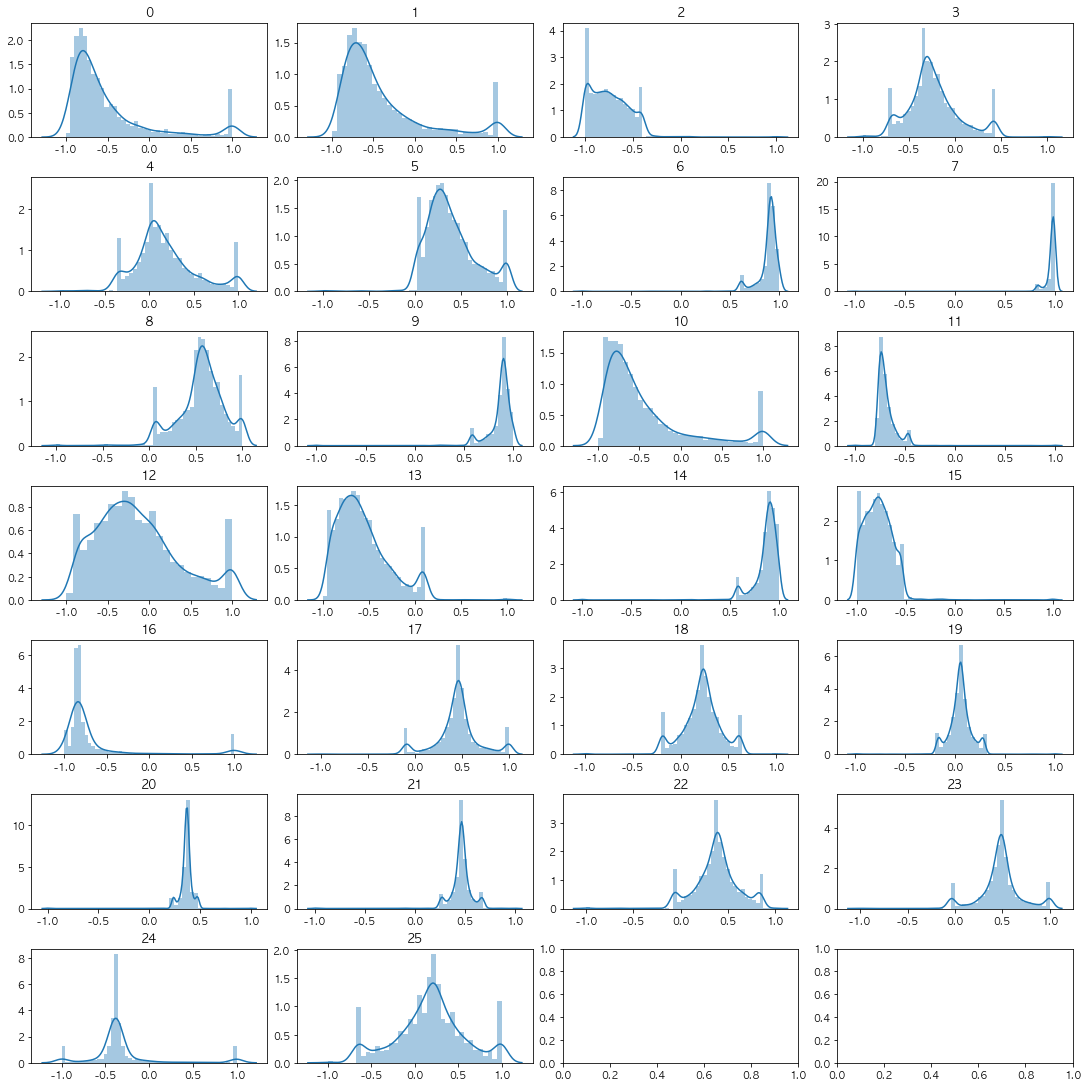

In [23]:
fig, axes = plt.subplots(nrows = 7, ncols = 4,figsize=(15, 15),constrained_layout=True)   
axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(1, 15) #비율로 figsize 조정 

for ax, col in zip(axes, X_train_min.columns):
  sns.distplot(X_train_min[col], ax = ax)
  ax.set(xlabel="", ylabel="")
  ax.set_title(col)

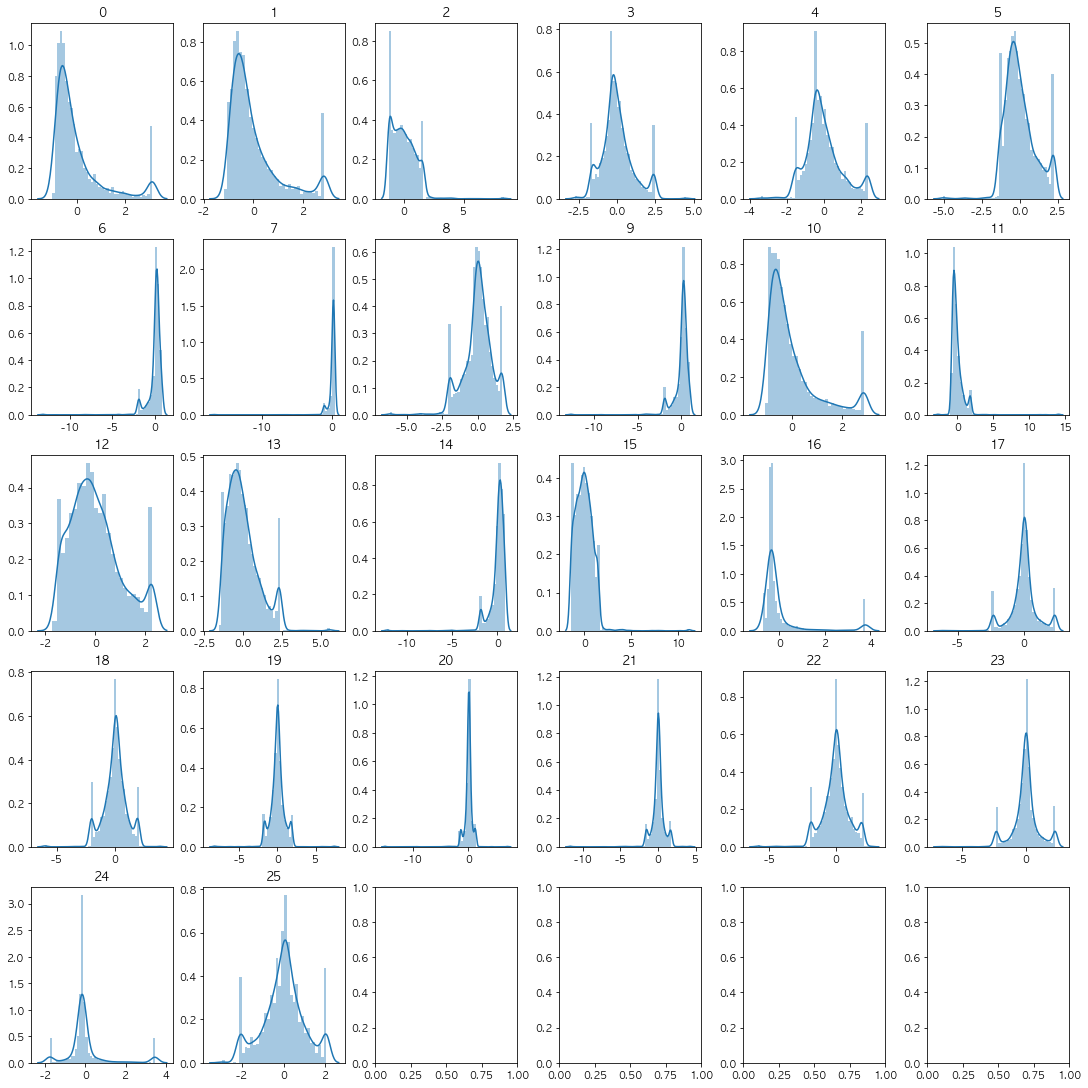

In [24]:
fig, axes = plt.subplots(nrows = 5, ncols = 6,figsize=(15, 15),constrained_layout=True)   
axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(1, 15) #비율로 figsize 조정 

for ax, col in zip(axes, X_train_std.columns):
  sns.distplot(X_train_std[col], ax = ax)
  ax.set(xlabel="", ylabel="")
  ax.set_title(col)

In [25]:
X_resampled_min.columns=recession_x.columns
X_resampled_std.columns=recession_x.columns

In [26]:
X_resampled_min

,매입채무회전률,유동비율,차입금의존도,매출액증가율,총자본증가율,매출액총이익률,매출액영업이익률,매출액순이익률,총자본영업이익률,자기자본순이익률,...,이자보상배율,vol유동비율,vol총자본증가율,vol매출액총이익률,vol매출액영업이익률,vol자기자본순이익률,vol총자본영업이익률,vol당좌비율,vol이자보상배율,vol총자본회전률
0,-0.617635,-0.448531,-1.000000,-0.307481,-0.352413,0.027771,0.612341,0.827465,0.070492,0.578896,...,-0.973790,0.588893,-0.192722,0.178087,0.477945,0.355910,0.389921,0.660268,-0.786685,0.296875
1,-0.552918,-0.385258,-0.946911,-0.218554,-0.250943,0.706667,0.930709,0.978387,0.720825,0.894708,...,-0.803310,0.683261,0.433646,-0.018451,0.476476,0.675679,0.844876,0.730373,-0.290096,1.000000
2,-0.879045,-0.617183,-0.680041,-0.436481,0.210095,0.073461,0.707274,0.827465,0.201590,0.619946,...,-0.884346,0.502016,0.202298,0.074210,0.365188,0.347987,0.511261,0.542373,-0.090896,0.015625
3,-0.679808,-0.667196,-0.582609,-0.110806,0.079745,0.989130,0.954931,0.976836,0.847840,0.882675,...,-0.789630,0.486367,0.222554,0.140535,0.367996,0.348021,0.456363,0.510530,-0.340665,0.546875
4,-0.841176,-0.132898,-0.676481,-0.125000,0.012228,0.289002,0.893910,0.980490,0.497743,0.895549,...,-0.845749,0.468142,-0.192722,0.201496,0.460837,0.494977,0.844876,0.464190,-0.310849,0.140625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,-0.758582,-0.852149,-0.253616,-0.303539,-0.197916,0.116250,0.868178,0.953738,0.365526,0.303522,...,-0.859989,0.398729,0.013858,-0.047334,0.337696,-0.132981,0.130754,0.461088,-0.404270,0.272075
5267,-0.744711,-0.800424,-0.221111,-0.610307,-0.374845,0.149280,0.785702,0.905216,0.122144,0.204909,...,-0.874727,0.150288,0.213097,-0.021011,0.320010,0.039857,0.162368,0.305090,-0.389609,0.046121
5268,-0.458054,-0.335352,-0.806504,-0.538137,0.497553,0.580300,0.638912,0.886079,0.136009,0.707972,...,-0.902120,0.686559,0.657974,0.181124,0.311287,0.639283,0.286811,0.756489,-0.379651,-0.088029
5269,-0.431418,-0.871683,-0.261169,-0.358666,-0.144390,-0.053362,0.819041,0.948570,0.293597,0.700861,...,-0.865770,0.327143,0.151627,-0.040175,0.333207,0.357601,0.246782,0.407668,-0.392227,0.225063


# 수축 DT min

## 수축기 DT grid

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9, max_features='log2', random_state=1024)

In [27]:
# # DT 수축기 min
# X_train,X_test,y_train,y_test = train_test_split(X_resampled_min,y_resampled_min,test_size=0.2)

# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'ccp_alpha': [0.1, .01, .001],
#               'max_depth' : [5, 6, 7, 8, 9],
#               'criterion' :['gini', 'entropy']
#              }
# tree_clas = DecisionTreeClassifier(random_state=1024)
# grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
# grid_search.fit(X_train, y_train)
# final_model = grid_search.best_estimator_
# final_model

#DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9, max_features='log2', random_state=1024)

0.963
0.346


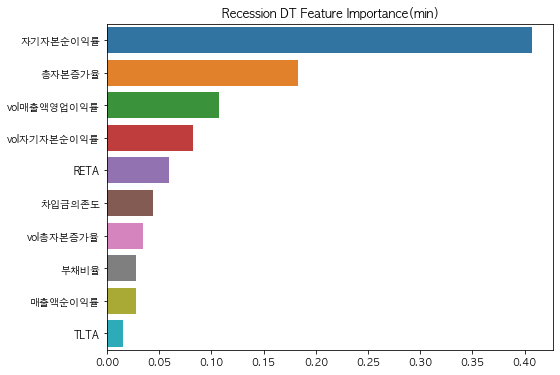

,TOP 10 Recession DT Feature Importance(min)
자기자본순이익률,0.407343
총자본증가율,0.183362
vol매출액영업이익률,0.107025
vol자기자본순이익률,0.082528
RETA,0.059537
차입금의존도,0.044263
vol총자본증가율,0.034788
부채비율,0.027644
매출액순이익률,0.027258
TLTA,0.015250


In [28]:
from sklearn.tree import  DecisionTreeClassifier
import seaborn as sns

tree_min = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2', random_state=1024)
                       
tree_min.fit(X_resampled_min,y_resampled_min)
score_tr_min = tree_min.score(X_resampled_min,y_resampled_min)
score_te_min = tree_min.score(RAW_X_test,RAW_y_test)
print('{:.3f}'.format(score_tr_min))
print('{:.3f}'.format(score_te_min))
# 1.000


feature_imp_min = tree_min.feature_importances_

dt_seires_min= pd.Series(feature_imp_min,index=X_resampled_min.columns)
dt_top10_min=dt_seires_min.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Recession DT Feature Importance(min)')
sns.barplot(x=dt_top10_min,y=dt_top10_min.index)
plt.show()

result_df_min = pd.DataFrame(dt_top10_min)
result_df_min.columns=['TOP 10 Recession DT Feature Importance(min)']
result_df_min.to_csv('../Data/수축기 feature csv/수축DT(min).csv',index=True,encoding='CP949')
result_df_min


## 수축기 DT std grid

In [29]:
# DT 수축기 std grid
#DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='auto',random_state=1024)

# X_train,X_test,y_train,y_test = train_test_split(X_resampled_std,y_resampled_std,test_size=0.2)

# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'ccp_alpha': [0.1, .01, .001],
#               'max_depth' : [5, 6, 7, 8, 9],
#               'criterion' :['gini', 'entropy']
#              }
# tree_clas = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='auto',
#                        random_state=1024)
# grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
# grid_search.fit(X_train, y_train)
# final_model = grid_search.best_estimator_
# final_model

## 수축기 DT std

0.961


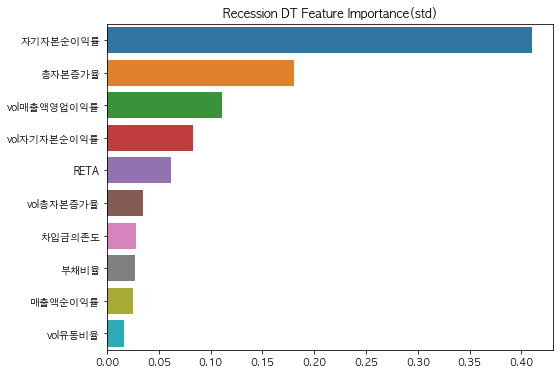

,TOP 10 Recession DT Feature Importance(std)
자기자본순이익률,0.410389
총자본증가율,0.180081
vol매출액영업이익률,0.110463
vol자기자본순이익률,0.082574
RETA,0.061949
vol총자본증가율,0.034628
차입금의존도,0.027538
부채비율,0.026853
매출액순이익률,0.024580
vol유동비율,0.016289


In [30]:
from sklearn.tree import  DecisionTreeClassifier
import seaborn as sns

tree_std = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2', random_state=1024)
                       
tree_std.fit(X_resampled_std,y_resampled_std)
score_tr_std = tree_std.score(X_resampled_std,y_resampled_std)

print('{:.3f}'.format(score_tr_std))
# 1.000


feature_imp_std = tree_std.feature_importances_

dt_seires_std= pd.Series(feature_imp_std,index=X_resampled_std.columns)
dt_top10_std=dt_seires_std.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Recession DT Feature Importance(std)')
sns.barplot(x=dt_top10_std,y=dt_top10_std.index)
plt.show()

result_df_std = pd.DataFrame(dt_top10_std)
result_df_std.columns=['TOP 10 Recession DT Feature Importance(std)']
result_df_std.to_csv('../Data/수축기 feature csv/수축DT(std).csv',index=True,encoding='CP949')
result_df_std


In [31]:
DT_features = pd.concat([result_df_min,result_df_std],axis=1)
DT_features

DT_features.to_csv('../DATA/고르자 이제/DT_features.csv',index=True,encoding='CP949')

## 수축기 RF min GRID

In [32]:
# 수축기 RF min
# RandomForestClassifier(max_depth=9, max_features='log2', n_estimators=60,random_state=1024)
# from sklearn.ensemble import RandomForestClassifier
# X_train,X_test,y_train,y_test = train_test_split(X_resampled_min,y_resampled_min,test_size=0.2)

# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'max_depth' : [5, 6, 7, 8, 9],
#               'criterion' :['gini', 'entropy'],
#               'n_estimators':[10,20,30,40,50,60,70,80,90,100]
#              }
# tree_clas = RandomForestClassifier(random_state=1024)
# grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=False)
# grid_search.fit(X_train, y_train)
# final_model = grid_search.best_estimator_
# final_model

## 수축기 RF min

0.991
0.025


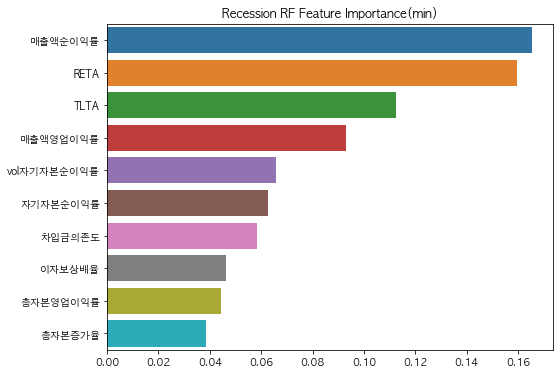

,TOP 10 Recession RF Feature Importance(min)
매출액순이익률,0.165506
RETA,0.159570
TLTA,0.112301
매출액영업이익률,0.093174
vol자기자본순이익률,0.065718
자기자본순이익률,0.062507
차입금의존도,0.058329
이자보상배율,0.046358
총자본영업이익률,0.044474
총자본증가율,0.038362


In [33]:
from sklearn.ensemble import RandomForestClassifier
tree_rf_min = RandomForestClassifier(max_depth=9, max_features='log2', n_estimators=60,
                       random_state=1024) #girdcv 완료
tree_rf_min.fit(X_resampled_min,y_resampled_min)
score_tr_rf_min = tree_rf_min.score(X_resampled_min,y_resampled_min)
score_te_rf_min = tree_rf_min.score(RAW_X_test,RAW_y_test)

print('{:.3f}'.format(score_tr_rf_min))
# 1.000
print('{:.3f}'.format(score_te_rf_min))


feature_imp_rf_min = tree_rf_min.feature_importances_

rf_seires_min= pd.Series(feature_imp_rf_min,index=X_resampled_min.columns)
rf_top10_min=rf_seires_min.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Recession RF Feature Importance(min)')
sns.barplot(x=rf_top10_min,y=rf_top10_min.index)
plt.show()

result_df_rf_min = pd.DataFrame(rf_top10_min)
result_df_rf_min.columns=['TOP 10 Recession RF Feature Importance(min)']
result_df_rf_min.to_csv('../Data/수축기 feature csv/수축RF(min).csv',index=True,encoding='cp949')
result_df_rf_min


# 수축기 RF std GRID

In [34]:
# 수축기 RF std
#RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=50,random_state=1024)
from sklearn.ensemble import RandomForestClassifier
# X_train,X_test,y_train,y_test = train_test_split(X_resampled_std,y_resampled_std,test_size=0.2)

# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
#               'max_depth' : [5, 6, 7, 8, 9],
#               'criterion' :['gini', 'entropy'],
#               'n_estimators':[10,20,30,40,50,60,70,80,90,100]
#              }
# tree_clas = RandomForestClassifier(random_state=1024)
# grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=False)
# grid_search.fit(X_train, y_train)
# final_model = grid_search.best_estimator_
# final_model

## 수축기 RF std

0.994
0.115


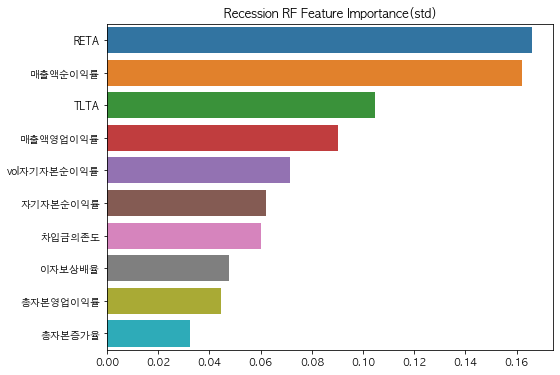

,TOP 10 Recession RF Feature Importance(std)
RETA,0.166119
매출액순이익률,0.162093
TLTA,0.104873
매출액영업이익률,0.090318
vol자기자본순이익률,0.071538
자기자본순이익률,0.062132
차입금의존도,0.060237
이자보상배율,0.047713
총자본영업이익률,0.044474
총자본증가율,0.032380


In [35]:
from sklearn.ensemble import RandomForestClassifier
tree_rf_std = RandomForestClassifier(max_depth=9, max_features='log2', n_estimators=60,
                       random_state=1024) #girdcv 완료
tree_rf_std.fit(X_resampled_std,y_resampled_std)
score_tr_rf_std = tree_rf_std.score(X_resampled_std,y_resampled_std)
score_te_rf_std = tree_rf_std.score(RAW_X_test,RAW_y_test)

print('{:.3f}'.format(score_tr_rf_std))
# 1.000
print('{:.3f}'.format(score_te_rf_std))


feature_imp_rf_std = tree_rf_std.feature_importances_

rf_seires_std= pd.Series(feature_imp_rf_std,index=X_resampled_std.columns)
rf_top10_std=rf_seires_std.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Recession RF Feature Importance(std)')
sns.barplot(x=rf_top10_std,y=rf_top10_std.index)
plt.show()

result_df_rf_std = pd.DataFrame(rf_top10_std)
result_df_rf_std.columns=['TOP 10 Recession RF Feature Importance(std)']
result_df_rf_std.to_csv('../Data/수축기 feature csv/수축RF(std).csv',index=True,encoding='cp949')
result_df_rf_std


In [36]:
RF_features = pd.concat([result_df_rf_min,result_df_rf_std],axis=1)
RF_features

RF_features.to_csv('../DATA/고르자 이제/RF_features.csv',index=True,encoding='CP949')

# 수축기 로지스틱


Optimization terminated successfully.
         Current function value: 0.174626
         Iterations 11


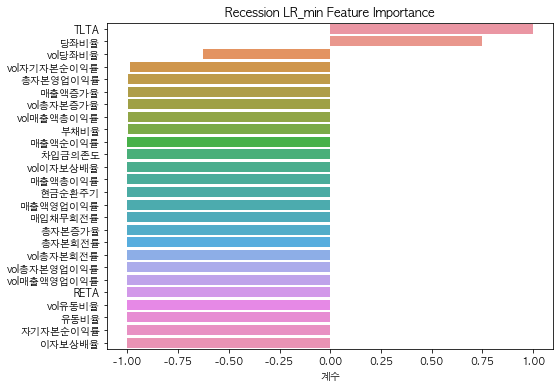

In [51]:
# 수축기 로지스틱 min 
import statsmodels.api as sm
model = sm.Logit(y_resampled_min,X_resampled_min)
results = model.fit(method = "newton")
results.summary()

# a = np.exp(results.params) #로지스틱 회귀계수 출력
# a = pd.DataFrame(a)
# a.columns=['계수']
# a = a.sort_values(by='계수',ascending=False)
# a



a = np.exp(results.params)
a = pd.DataFrame(a)
a.columns=['계수']
a = a.sort_values(by='계수',ascending=False)
a

scaler = MinMaxScaler(feature_range=(-1, 1))
b = scaler.fit_transform(a)

b = pd.DataFrame(b)
b.columns=['계수']
b.index= a.index

plt.figure(figsize=(8,6))
plt.title('Recession LR_min Feature Importance')
sns.barplot(x=b['계수'],y=b.index)
plt.show()

Optimization terminated successfully.
         Current function value: 0.484612
         Iterations 10


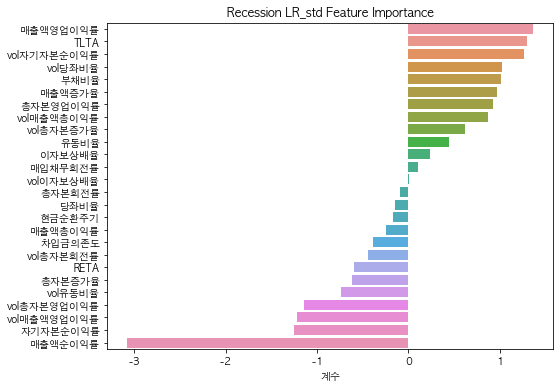

In [52]:
# 수축기 로지스틱 std 
import statsmodels.api as sm
model = sm.Logit(y_resampled_std,X_resampled_std)
results = model.fit(method = "newton")
results.summary()

# a = np.exp(results.params) #로지스틱 회귀계수 출력
# a = pd.DataFrame(a)
# a.columns=['계수']
# a = a.sort_values(by='계수',ascending=False)
# a



a = np.exp(results.params)
a = pd.DataFrame(a)
a.columns=['계수']
a = a.sort_values(by='계수',ascending=False)
a

scaler = StandardScaler()
b = scaler.fit_transform(a)

b = pd.DataFrame(b)
b.columns=['계수']
b.index= a.index

plt.figure(figsize=(8,6))
plt.title('Recession LR_std Feature Importance')
sns.barplot(x=b['계수'],y=b.index)
plt.show()

In [ ]:
# 수축기 로지스틱 std 
import statsmodels.api as sm
model_std = sm.Logit(y_resampled_std,X_resampled_std)
results_std = model_std.fit(method = "newton")
results.summary()

a_std = np.exp(results.params) #로지스틱 회귀계수 출력
a_std = pd.DataFrame(a_std)
a_std.columns=['계수']
a_std = a_std.sort_values(by='계수',ascending=False)
a_std



scaler_std = StandardScaler()
a_std = scaler_std.fit_transform(a_std)
plt.figure(figsize=(8,6))
plt.title('Expansion LR_std Feature Importance')
sns.barplot(x=a_std['계수'],y=a_std.index)
plt.show()

In [ ]:
# scaler_min = MinMaxScaler(feature_range=(-1, 1))
# b = scaler.fit_transform(a)

# b = pd.DataFrame(b)
# b.columns=['계수']
# b.index= a.index

# plt.figure(figsize=(8,6))
# plt.title('Expansion LR_min Feature Importance')
# sns.barplot(x=b['계수'],y=b.index)
# plt.show()

# 수축기 로지스틱 min

In [ ]:
# import statsmodels.api as sm
# model = sm.Logit(y_resampled_min,X_resampled_min)
# results = model.fit(method = "newton")
# results.summary()

# a = np.exp(results.params) #로지스틱 회귀계수 출력
# a = pd.DataFrame(a)
# a.columns=['계수']
# a = a.sort_values(by='계수',ascending=False)
# a

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_logit_min=X_resampled_min
y_logit_min=y_resampled_min

# X_logit_min=sm.add_constant(X_logit_min)
logit_model_min=sm.Logit(y_logit_min,X_logit_min)
result_logit_min=logit_model_min.fit()
print(result_logit_min.summary())

Optimization terminated successfully.
         Current function value: 0.174626
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                     부도   No. Observations:                 5271
Model:                          Logit   Df Residuals:                     5245
Method:                           MLE   Df Model:                           25
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.7257
Time:                        13:34:08   Log-Likelihood:                -920.45
converged:                       True   LL-Null:                       -3355.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
매입채무회전률         0.0287      0.158      0.182      0.855      -0.280       0.338
유동비율           -9.9163   

In [ ]:
#predict, evaluate 단계 실행

log_reg_min=LogisticRegression()
log_reg_min.fit(X_logit_min, y_logit_min)
print('Train set 정확도: %.2f' %log_reg_min.score(X_logit_min,y_logit_min))
print('Test set 정확도 : %.2f' %log_reg_min.score(RAW_X_test,RAW_y_test))

from sklearn.metrics import classification_report

y_pred_logit_min=log_reg_min.predict(X_logit_min)
print(classification_report(y_logit_min, y_pred_logit_min))

Train set 정확도: 0.92
Test set 정확도 : 0.38
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      3514
         1.0       0.88      0.87      0.88      1757

    accuracy                           0.92      5271
   macro avg       0.91      0.91      0.91      5271
weighted avg       0.92      0.92      0.92      5271



In [ ]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# 모델 입력, n_features_to_select: 골라낼 변수의 수, step: 한번에 몇개씩 제거할지 선택
rfe = RFE(lr, n_features_to_select=12, step=1)
X_resampled_min_logit = pd.DataFrame(X_resampled_min)
model = rfe.fit(X_resampled_min,y_resampled_min)
# 선택될 변수
model.support_
# 변수 중요도(숫자 높을수록 불필요하다)
model.ranking_

array([15,  1,  1,  6, 12,  7,  1,  3,  4,  1,  1,  1, 11, 14,  1,  1,  9,
        8,  1,  1,  5,  1,  1,  2, 13, 10])

In [ ]:
min_logit_lst = list(model.ranking_)
lr_rank_min = pd.DataFrame(min_logit_lst ,index = [X_resampled_min.columns],columns=['rank'])
lr_rank_min.sort_values(by='rank',inplace=True)

lr_rank_min.iloc[:12].to_csv('../Data/수축기 feature csv/수축logit(min).csv',index=True,encoding='cp949')
lr_rank_min.columns=['Recession LR rank(min)']
lr_rank_min

,Recession LR rank(min)
당좌비율,1
유동비율,1
차입금의존도,1
vol총자본증가율,1
TLTA,1
매출액영업이익률,1
자기자본순이익률,1
vol매출액총이익률,1
부채비율,1
vol총자본영업이익률,1


In [ ]:
lr_rank_min_sort = np.exp(result_logit_min.params) #로지스틱 회귀계수 출력
lr_rank_min_sort = pd.DataFrame(lr_rank_min_sort)
lr_rank_min_sort.columns=['Recession LR rank(min)']
lr_rank_min_sort = lr_rank_min_sort.sort_values(by='Recession LR rank(min)',ascending=False)
lr_rank_min_sort['순위'] = range(1,27)
lr_rank_min_sort.to_csv('../DATA/고르자 이제/Recession lr_rank_min_sort.csv',index=True,encoding='CP949')
lr_rank_min_sort

NameError: name 'result_logit_min' is not defined

# 수축기 로지스틱 std

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_logit_std=X_resampled_std
y_logit_std=y_resampled_std

# X_logit_std=sm.add_constant(X_logit_std)
logit_model_std=sm.Logit(y_logit_std,X_logit_std)
result_logit_std=logit_model_std.fit()
print(result_logit_std.summary())


Optimization terminated successfully.
         Current function value: 0.484612
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                     부도   No. Observations:                 5271
Model:                          Logit   Df Residuals:                     5245
Method:                           MLE   Df Model:                           25
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.2386
Time:                        13:34:09   Log-Likelihood:                -2554.4
converged:                       True   LL-Null:                       -3355.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
매입채무회전률         0.0529      0.038      1.400      0.162      -0.021       0.127
유동비율            0.1416   

In [ ]:
#predict, evaluate 단계 실행

log_reg_std=LogisticRegression()
log_reg_std.fit(X_logit_std, y_logit_std)
print('Train set 정확도: %.2f' %log_reg_std.score(X_logit_std,y_logit_std))
print('Test set 정확도 : %.2f' %log_reg_std.score(RAW_X_test,RAW_y_test))

from sklearn.metrics import classification_report

y_pred_logit_std=log_reg_std.predict(X_logit_std)
print(classification_report(y_logit_std, y_pred_logit_std))

Train set 정확도: 0.93
Test set 정확도 : 0.65
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      3514
         1.0       0.89      0.90      0.89      1757

    accuracy                           0.93      5271
   macro avg       0.92      0.92      0.92      5271
weighted avg       0.93      0.93      0.93      5271



In [ ]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# 모델 입력, n_features_to_select: 골라낼 변수의 수, step: 한번에 몇개씩 제거할지 선택
rfe = RFE(lr, n_features_to_select=12, step=1)
X_resampled_std_logit = pd.DataFrame(X_resampled_std)
model = rfe.fit(X_resampled_std,y_resampled_std)
# 선택될 변수
model.support_
# 변수 중요도(숫자 높을수록 불필요하다)
model.ranking_

array([14,  1,  9,  4,  7, 10, 11, 13, 15,  1,  1,  2,  1, 12,  1,  1,  3,
        1,  1,  1,  6,  1,  1,  1,  8,  5])

In [ ]:
std_logit_lst = list(model.ranking_)
lr_rank_std = pd.DataFrame(std_logit_lst ,index = [X_resampled_std.columns],columns=['rank'])
lr_rank_std.sort_values(by='rank',inplace=True)

lr_rank_std.iloc[:12].to_csv('../Data/수축기 feature csv/수축logit(std).csv',index=True,encoding='cp949')


lr_rank_std.columns=['Recession LR rank(std)']
lr_rank_std

,Recession LR rank(std)
총자본회전률,1
유동비율,1
vol당좌비율,1
vol총자본영업이익률,1
vol자기자본순이익률,1
vol매출액총이익률,1
vol총자본증가율,1
vol유동비율,1
자기자본순이익률,1
당좌비율,1


In [ ]:
lr_rank_std_sort = np.exp(result_logit_std.params) #로지스틱 회귀계수 출력
lr_rank_std_sort = pd.DataFrame(lr_rank_std_sort)
lr_rank_std_sort.columns=['Recession LR rank(std)']
lr_rank_std_sort = lr_rank_std_sort.sort_values(by='Recession LR rank(std)',ascending=False)
lr_rank_std_sort['순위'] = range(1,27)
lr_rank_std_sort.to_csv('../DATA/고르자 이제/Recession lr_rank_std_sort.csv',index=True,encoding='CP949')
lr_rank_std_sort

,Recession LR rank(std),순위
매출액영업이익률,1.422511,1
TLTA,1.403376,2
vol자기자본순이익률,1.391864,3
vol당좌비율,1.323360,4
부채비율,1.319568,5
매출액증가율,1.306408,6
총자본영업이익률,1.293686,7
vol매출액총이익률,1.277021,8
vol총자본증가율,1.202332,9
유동비율,1.152117,10


In [ ]:
lr_features = pd.concat([lr_rank_min_sort,lr_rank_std_sort],axis=1)
lr_features.to_csv('../DATA/고르자 이제/lr_features.csv',index=True,encoding='CP949')
lr_features


,Recession LR rank(min),순위,Recession LR rank(std),순위
TLTA,1.303695e+04,1,1.403376,2
당좌비율,1.140016e+04,2,0.979183,15
vol당좌비율,2.444939e+03,3,1.323360,4
vol자기자본순이익률,7.016359e+01,4,1.391864,3
총자본영업이익률,1.422866e+01,5,1.293686,7
매출액증가율,1.030818e+01,6,1.306408,6
vol총자본증가율,1.003231e+01,7,1.202332,9
vol매출액총이익률,9.296360e+00,8,1.277021,8
부채비율,5.386667e+00,9,1.319568,5
매출액순이익률,3.504036e+00,10,0.120160,26


------------

# 수축기 xgb min GRID

### XGBClassifier
                (base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_constraints='()', n_estimators=12, n_jobs=0,
               num_parallel_tree=1, predictor='auto', random_state=99,
               reg_alpha=0, reg_lambda=1, ...)

제외 missing,reg_alpha

In [ ]:
# 수축기 xgb min
# import xgboost
# from xgboost import XGBClassifier
# from sklearn import model_selection
# from sklearn.model_selection import GridSearchCV

# X_train,X_test,y_train,y_test = train_test_split(X_resampled_min,y_resampled_min,test_size=0.2)

# xg = XGBClassifier()
# xg_parameters ={'max_depth' : [3,4,5,6] , 'n_estimators': [12,24,32], 'learning_rate':[0.01, 0.1], 'gamma': [0.5, 1, 2], 'random_state':[99]}

# grid_search_xg = model_selection.GridSearchCV ( estimator = xg, param_grid = xg_parameters, scoring = 'recall', cv = 10 )
# grid_search_xg.fit(X_train, y_train)
# best_xg = grid_search_xg.best_estimator_
# best_xg

# XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
#               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
#               early_stopping_rounds=None, enable_categorical=False,
#               eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
#               importance_type=None, interaction_constraints='',
#               learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
#               max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
#               missing=nan, monotone_constraints='()', n_estimators=12, n_jobs=0,
#               num_parallel_tree=1, predictor='auto', random_state=99,
#               reg_alpha=0, reg_lambda=1, ...)

#missing,reg_alpha

## 수축기 xgb min

0.925
0.025


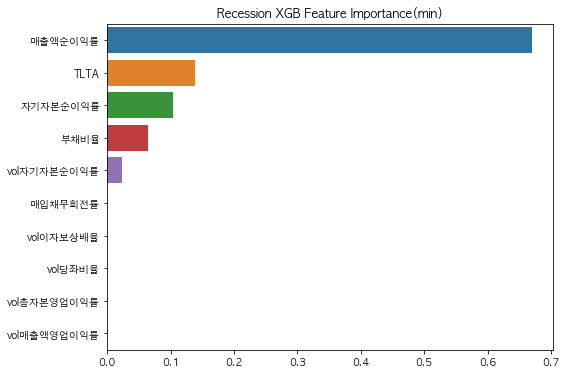

,TOP 10 Recession XGB Feature Importance(min)
매출액순이익률,0.670100
TLTA,0.137935
자기자본순이익률,0.103730
부채비율,0.064464
vol자기자본순이익률,0.023771
매입채무회전률,0.000000
vol이자보상배율,0.000000
vol당좌비율,0.000000
vol총자본영업이익률,0.000000
vol매출액영업이익률,0.000000


In [ ]:
import xgboost
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

xg_min = XGBClassifier(base_score=0.5,booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
               monotone_constraints='()', n_estimators=12, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=99,
               reg_lambda=1)
# reg_alpha=1
xg_min.fit(X_resampled_min,y_resampled_min)
score_tr_xgb_min = xg_min.score(X_resampled_min,y_resampled_min)
score_te_xgb_min = xg_min.score(RAW_X_test,RAW_y_test)

print('{:.3f}'.format(score_tr_xgb_min))
# 1.000
print('{:.3f}'.format(score_te_xgb_min))


feature_imp_xgb_min =xg_min.feature_importances_

dt_seires_xgb_min= pd.Series(feature_imp_xgb_min,index=X_resampled_min.columns)
dt_top10_xgb_min=dt_seires_xgb_min.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Recession XGB Feature Importance(min)')
sns.barplot(x=dt_top10_xgb_min,y=dt_top10_xgb_min.index)
plt.show()

result_df_xgb_min = pd.DataFrame(dt_top10_xgb_min)
result_df_xgb_min.columns=['TOP 10 Recession XGB Feature Importance(min)']
result_df_xgb_min.to_csv('../Data/수축기 feature csv/수축xgb(min).csv',index=True,encoding='cp949')
result_df_xgb_min

# 수축기 xgb std

In [ ]:
# # 수축기 xgb std
# import xgboost
# from xgboost import XGBClassifier
# from sklearn import model_selection
# from sklearn.model_selection import GridSearchCV

# X_train_std,X_test,y_train_std,y_test = train_test_split(X_resampled_std,y_resampled_std,test_size=0.2)

# xg = XGBClassifier()
# xg_parameters ={'max_depth' : [3,4,5,6] , 'n_estimators': [12,24,32], 'learning_rate':[0.01, 0.1], 'gamma': [0.5, 1, 2], 'random_state':[99]}

# grid_search_xg_std = model_selection.GridSearchCV ( estimator = xg, param_grid = xg_parameters, scoring = 'recall', cv = 10 )
# grid_search_xg_std.fit(X_train_std, y_train_std)
# best_xg_std = grid_search_xg_std.best_estimator_
# best_xg_std

[13:34:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "std_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.922
0.053


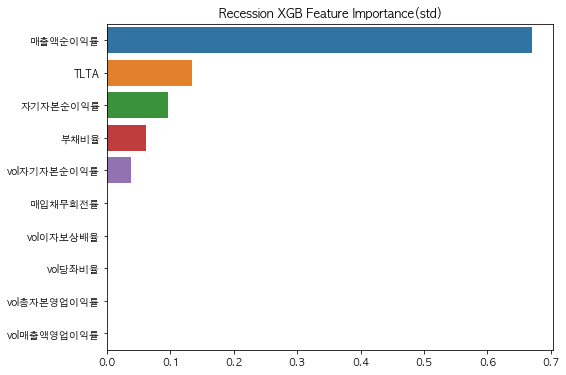

,TOP 10 Recession XGB Feature Importance(std)
매출액순이익률,0.670827
TLTA,0.133751
자기자본순이익률,0.096482
부채비율,0.060831
vol자기자본순이익률,0.038109
매입채무회전률,0.000000
vol이자보상배율,0.000000
vol당좌비율,0.000000
vol총자본영업이익률,0.000000
vol매출액영업이익률,0.000000


In [ ]:
import xgboost
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

xg_std = XGBClassifier(base_score=0.5,booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, std_child_weight=1,
               monotone_constraints='()', n_estimators=12, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=99,
               reg_lambda=1)
# reg_alpha=1
xg_std.fit(X_resampled_std,y_resampled_std)
score_tr_xgb_std = xg_std.score(X_resampled_std,y_resampled_std)
score_te_xgb_std = xg_std.score(RAW_X_test,RAW_y_test)

print('{:.3f}'.format(score_tr_xgb_std))
# 1.000
print('{:.3f}'.format(score_te_xgb_std))


feature_imp_xgb_std =xg_std.feature_importances_

dt_seires_xgb_std= pd.Series(feature_imp_xgb_std,index=X_resampled_std.columns)
dt_top10_xgb_std=dt_seires_xgb_std.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Recession XGB Feature Importance(std)')
sns.barplot(x=dt_top10_xgb_std,y=dt_top10_xgb_std.index)
plt.show()

result_df_xgb_std = pd.DataFrame(dt_top10_xgb_std)
result_df_xgb_std.columns=['TOP 10 Recession XGB Feature Importance(std)']
result_df_xgb_std.to_csv('../Data/수축기 feature csv/수축xgb(std).csv',index=True,encoding='cp949')
result_df_xgb_std

In [ ]:
XGB_features = pd.concat([result_df_xgb_min,result_df_xgb_std],axis=1)
XGB_features
XGB_features.to_csv('../DATA/고르자 이제/XGB_features.csv',index=True,encoding='CP949')